In [16]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("DATA1.xlsx")

pd

<module 'pandas' from 'C:\\Users\\Acer\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

In [17]:
data['TIME PERIOD'] = pd.to_datetime(data['TIME PERIOD'])
data = data.set_index('TIME PERIOD')

In [18]:
col_10y = "Yield curve spot rate, 10-year maturity - Government bond, nominal, all issuers whose rating is triple A - Euro area (changing composition) (YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_10Y)"
col_30y = "Yield curve spot rate, 30-year maturity - Government bond, nominal, all issuers whose rating is triple A - Euro area (changing composition) (YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_30Y)"
col_3y  = "Yield curve spot rate, 3-year maturity - Government bond, nominal, all issuers whose rating is triple A - Euro area (changing composition) (YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_3Y)"
col_4y  = "Yield curve spot rate, 4-year maturity - Government bond, nominal, all issuers whose rating is triple A - Euro area (changing composition) (YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_4Y)"
col_5y  = "Yield curve spot rate, 5-year maturity - Government bond, nominal, all issuers whose rating is triple A - Euro area (changing composition) (YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_5Y)"
col_7y  = "Yield curve spot rate, 7-year maturity - Government bond, nominal, all issuers whose rating is triple A - Euro area (changing composition) (YC.B.U2.EUR.4F.G_N_A.SV_C_YM.SR_7Y)"

maturity_cols = [col_3y, col_4y, col_5y, col_7y, col_10y, col_30y]
maturities = [3, 4, 5, 7, 10, 30]

yields_df = data[maturity_cols].copy()
yields_df.columns = maturities 

print(yields_df)

                   3         4         5         7         10        30
TIME PERIOD                                                            
2004-09-06   2.951578  3.223235  3.457222  3.828505  4.209220  4.988680
2004-09-07   2.987293  3.252486  3.479518  3.839294  4.209626  4.975495
2004-09-08   3.016998  3.282196  3.507894  3.863753  4.228419  4.978894
2004-09-09   2.945649  3.206136  3.430628  3.789113  4.161872  4.946545
2004-09-10   2.884699  3.146724  3.374729  3.740559  4.120981  4.918530
...               ...       ...       ...       ...       ...       ...
2025-11-14   2.080873  2.183651  2.291231  2.503391  2.781156  3.275127
2025-11-17   2.090331  2.191427  2.298044  2.509580  2.787885  3.286435
2025-11-18   2.061074  2.158856  2.265176  2.481726  2.772599  3.266643
2025-11-19   2.065677  2.161656  2.268191  2.488096  2.785235  3.273890
2025-11-20   2.082935  2.178608  2.285113  2.506943  2.811268  3.305551

[5423 rows x 6 columns]


In [19]:
# DAILY CHANGES
dY = yields_df.diff()

# REMOVE NA
dY = dY.dropna()

print(dY)

# CONVERT TO BASIS POINTS
dY_bp = dY * 100

# COVARIANCE MATRIX
cov_matrix = dY_bp.cov()
print(cov_matrix)


           3          4          5          7          10         30
3   16.508723  16.501606  15.982130  14.716178  13.265878  10.856538
4   16.501606  16.922812  16.725257  15.817838  14.507927  11.996603
5   15.982130  16.725257  16.834068  16.367040  15.354920  12.884884
7   14.716178  15.817838  16.367040  16.686905  16.396639  14.243513
10  13.265878  14.507927  15.354920  16.396639  17.026807  15.699492
30  10.856538  11.996603  12.884884  14.243513  15.699492  22.657398


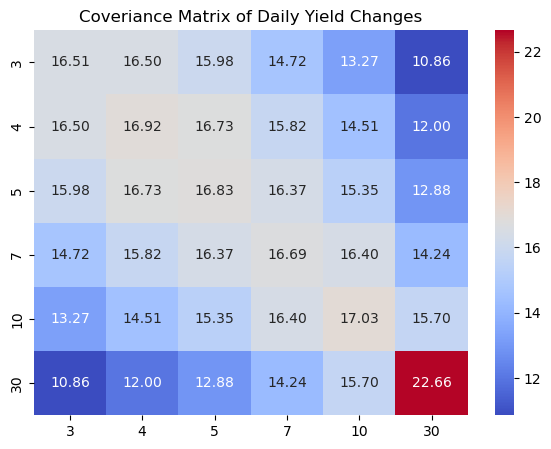

In [21]:
corr_matrix = dY_bp.corr()

plt.figure(figsize=(7,5))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Coveriance Matrix of Daily Yield Changes")
plt.show()


In [24]:
# use all components (one per maturity)
pca = PCA()

# fit PCA on daily changes in basis points
pca.fit(dY_bp)


PCA()

In [25]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=yields_df.columns,
    columns=[f"PC{i+1}" for i in range(len(yields_df.columns))]
)

print(loadings.round(3))


      PC1    PC2    PC3    PC4    PC5    PC6
3  -0.392  0.381 -0.475  0.561 -0.370 -0.158
4  -0.413  0.314 -0.225 -0.170  0.532  0.607
5  -0.420  0.223  0.024 -0.493  0.196 -0.701
7  -0.420  0.044  0.397 -0.335 -0.666  0.328
10 -0.411 -0.166  0.634  0.546  0.313 -0.080
30 -0.392 -0.823 -0.405 -0.067 -0.014  0.002


In [26]:
# standard deviation of factor scores
factor_std = np.sqrt(pca.explained_variance_)

pc_names = [f"PC{i+1}" for i in range(len(factor_std))]

std_table = pd.DataFrame({"StdDev": factor_std}, index=pc_names)

print(std_table.round(2))


     StdDev
PC1    9.57
PC2    3.46
PC3    1.66
PC4    0.53
PC5    0.11
PC6    0.01


In [27]:
var_ratio = pca.explained_variance_ratio_

var_table = pd.DataFrame({
    "Share_of_variance": var_ratio,
    "Cumulative_share": var_ratio.cumsum()
}, index=pc_names)

print(var_table.round(4))


     Share_of_variance  Cumulative_share
PC1             0.8592            0.8592
PC2             0.1121            0.9713
PC3             0.0259            0.9972
PC4             0.0027            0.9999
PC5             0.0001            1.0000
PC6             0.0000            1.0000


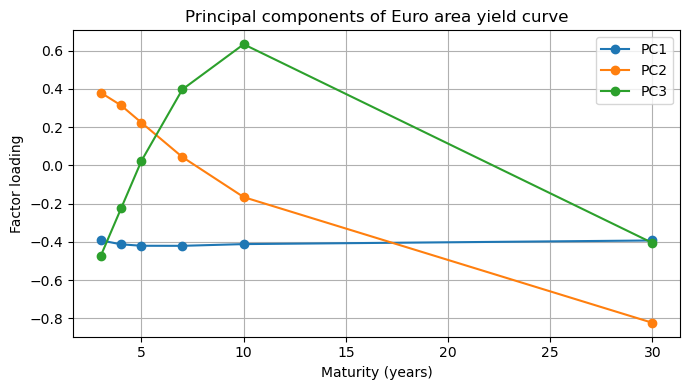

In [30]:
import matplotlib.pyplot as plt

maturities = list(loadings.index)  # [3,4,5,7,10,30]

plt.figure(figsize=(7,4))
plt.plot(maturities, loadings["PC1"], marker="o", label="PC1")
plt.plot(maturities, loadings["PC2"], marker="o", label="PC2")
plt.plot(maturities, loadings["PC3"], marker="o", label="PC3")

plt.xlabel("Maturity (years)")
plt.ylabel("Factor loading")
plt.title("Principal components of Euro area yield curve")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [42]:
# === PART 2: VaR with 1, 2, 3 PCA factors ===

# 1) Portfolio deltas from Table 9.8 (order: 3Y, 4Y, 5Y, 7Y, 10Y, 30Y)
deltas = np.array([10, 4, -8, -7, 2, 6], dtype=float)

# 2) Take PCA loadings for PC1, PC2, PC3 (your variable = loafings)
mats = [3, 4, 5, 7, 10, 30]
L = loadings.loc[mats, ["PC1", "PC2", "PC3"]].values   # 6x3 matrix

# 3) Standard deviation of factor scores
factor_std = np.sqrt(pca.explained_variance_)
sigma_f = factor_std[:3]     # PC1, PC2, PC3 only

# 4) Portfolio exposures to each factor (E1, E2, E3)
expo = deltas @ L
print("Factor exposures [PC1, PC2, PC3]:", expo)
print("Factor std devs  [PC1, PC2, PC3]:", sigma_f)

# 5) sigma(ΔP) and VaR for 1, 2, 3 factors
z_99 = 2.33
for n in [1, 2, 3]:
    var_n = np.sum((expo[:n] * sigma_f[:n])**2)
    sd_n = np.sqrt(var_n)
    var99_n = z_99 * sd_n
    print(f"{n} factor(s):  sigma(ΔP) = {sd_n:.3f}   VaR_99 = {var99_n:.3f}  (million USD)")


Factor exposures [PC1, PC2, PC3]: [-2.44169118 -2.29754481 -9.78668638]
Factor std devs  [PC1, PC2, PC3]: [9.57178584 3.45795665 1.66161296]
1 factor(s):  sigma(ΔP) = 23.371   VaR_99 = 54.455  (million USD)
2 factor(s):  sigma(ΔP) = 24.685   VaR_99 = 57.516  (million USD)
3 factor(s):  sigma(ΔP) = 29.560   VaR_99 = 68.874  (million USD)
